# Using Machine Learning to Identify Factors that Lead to Housing Matches for People Experiencing Homelessness

In [5]:
import pandas as pd
import numpy as np

In [7]:
ext = pd.read_csv("EXT- SDHOP All 2022.csv")

/var/folders/yq/xc2jl_lj5tl0pfdvsptynnp40000gp/T/ipykernel_78695/923635086.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,10,11,14,15,16,17,18,19,20,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,49,50,51,52,53,55,56,57,59,61,63,64,65,66,67,68,69,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  ext = pd.read_csv("EXT- SDHOP All 2022.csv")


All good data explorations start with data cleaning, let's scrub this thing!

In [11]:
# Dropping all columns that only have NaN values
ext = ext.dropna(axis=1,how="all")

In [18]:
drop_col = ["Agency", "Staff Created"]
ext = ext.drop(columns=drop_col)

In [23]:
drop_col2 = ["Personal ID", "Household ID"]
ext = ext.drop(columns=drop_col2)

In [51]:
columns = ext.columns.tolist()

Replacing words with numbers and Nan with 0.

In [27]:
ext = ext.replace({'Y': 1, "N": -1})

In [29]:
ext = ext.replace({'Yes': 1, "No": -1})

In [30]:
ext = ext.replace({'On': 1, "Off": -1})

In [45]:
ext = ext.replace({'Male': 1, "Female": -1})

In [46]:
ext = ext.replace({'Hispanic/Latin(a)(o)(x)': 1, "Non-Hispanic/Non-Latin(a)(o)(x)": -1})

In [43]:
ext = ext.replace({"Data not collected": 0})

In [35]:
ext = ext.fillna(0)

We also need to make a new column that is Time Enrolled, and sum the total from the "Amounts" columns

In [39]:
ext['Enrollment Start Date'] = pd.to_datetime(ext['Enrollment Start Date'])
ext['Enrollment Exit Date'] = pd.to_datetime(ext['Enrollment Exit Date'])

In [41]:
ext["Days Enrolled"] = (ext["Enrollment Exit Date"] - ext["Enrollment Start Date"]).dt.days

In [49]:
from datetime import datetime

ext['DOB'] = pd.to_datetime(ext['DOB'])

# Calculate age and create a new column
current_date = datetime.now()
ext['Age'] = (current_date - ext['DOB']).astype('<m8[Y]')

In [66]:
pd.set_option('display.max_columns', None)
types = ext["Amount"].dtypes
print(types)

object


In [71]:
# I need to change the datatypes of the Amount columns to be floats so I can add them correctly
cols_to_convert = ['Amount', 'Amount.1', 'Amount.2', 'Amount.3', 'Amount.4', 'Amount.5', 'Amount.7', 'Amount.8', 'Amount.9', 'Total Monthly Income for Individual', 'Amount.10', 'Amount.11', 'Amount.14']
ext[cols_to_convert] = ext[cols_to_convert].replace(',', '', regex=True).astype(float)
#ext[cols_to_convert] = ext[cols_to_convert].astype(float)

In [72]:
# Adding up all the amounts to get one Total Income column

ext['Total Income'] = ext.loc[:, ['Amount', 'Amount.1', 'Amount.2', 'Amount.3', 'Amount.4', 'Amount.5', 'Amount.7', 'Amount.8', 'Amount.9', 'Total Monthly Income for Individual', 'Amount.10', 'Amount.11', 'Amount.14']].sum(axis=1)


In [75]:
ext["Race"] = ext["Race"].astype(str)
unique_race = ext["Race"].sort_values().unique()

In [76]:
# Indexing by UID

ext = ext.set_index("Unique ID")

In [79]:
print(len(ext))
print(len(ext['Assigned Staff (* denotes Inactive)']))


1038
1038


In [83]:
distinct_staff = ext['Assigned Staff (* denotes Inactive)'].unique()
len(distinct_staff)

35

In [84]:
# Encoding each of the staff with a number

ext['Staff Encoded'], _ = pd.factorize(ext['Assigned Staff (* denotes Inactive)'])

In [87]:
encoded_values, staff_labels = pd.factorize(ext['Assigned Staff (* denotes Inactive)'])
staff_mapping = dict(zip(encoded_values, staff_labels))

for encoded_value, staff_name in staff_mapping.items():
    print(f"Encoded value {encoded_value} corresponds to staff member: {staff_name}")


Encoded value 0 corresponds to staff member: Anna Edson
Deactivated per ticket 40614 on 4-27-2022 Nicholas Thibault*
Encoded value 1 corresponds to staff member: Britni Hyde
Encoded value 2 corresponds to staff member: Emmanuel Navarro
Francisco Mendoza
Encoded value 3 corresponds to staff member: Yajaira Reyes
Marsha Duka
Encoded value 4 corresponds to staff member: Kevin Wagner
Encoded value 5 corresponds to staff member: Dolores Perez
Encoded value 6 corresponds to staff member: 0
Encoded value 7 corresponds to staff member: Francisco Mendoza
Francisco Mendoza
Francisco Mendoza
Francisco Mendoza
Encoded value 8 corresponds to staff member: Dolores Perez
Deactivated per ticket 45130 on 10-3-2022 Rasheedah Harrison*
Encoded value 9 corresponds to staff member: Curtis Manuel
Brice Michalek
Encoded value 10 corresponds to staff member: Francisco Mendoza
Deactivated per ticket 47460 on 2212023 Annette Llamas Haro*
Encoded value 11 corresponds to staff member: Ted Manaktala
Daniel Sturman

In [88]:
# Encoding each Race with a number

ext['Race'], _ = pd.factorize(ext['Race'])

In [90]:
encoded_values_race, race_labels = pd.factorize(ext['Race'])
race_mapping = dict(zip(encoded_values, race_labels))

for encoded_value, race_name in race_mapping.items():
    print(f"Encoded value {encoded_value} corresponds to race: {race_name}")

Encoded value 0 corresponds to race: 0
Encoded value 1 corresponds to race: 1
Encoded value 2 corresponds to race: 3
Encoded value 3 corresponds to race: 4
Encoded value 4 corresponds to race: 5
Encoded value 5 corresponds to race: 6
Encoded value 6 corresponds to race: 7


In [93]:
# Encoding each destination with a number

ext['Encoded Destination'], _ = pd.factorize(ext['Destination'])

In [ ]:
encoded_values_race, race_labels = pd.factorize(ext['Race'])
race_mapping = dict(zip(encoded_values, race_labels))

for encoded_value, race_name in race_mapping.items():
    print(f"Encoded value {encoded_value} corresponds to race: {race_name}")

In [91]:
drop_col3 = ['Assigned Staff (* denotes Inactive)',
 'Enrollment Start Date',
 'Enrollment Exit Date',
 'Amount',
 'Amount.1',
 'Amount.2',
 'Amount.3',
 'Amount.4',
 'Amount.5',
 'Amount.7',
 'Amount.8',
 'Amount.9',
 'Amount.10',
 'Amount.11',
 'Amount.14',]
ext = ext.drop(columns=drop_col3)

In [95]:
drop_col4 = ['DOB', "Destination"]
ext = ext.drop(columns=drop_col4)

In [98]:
drop_col5 = ['Total Income']
ext = ext.drop(columns=drop_col5)

In [118]:
drop_col6 = ['Specify Other Exit Destination']
ext = ext.drop(columns=drop_col6)

In [101]:
# Some people have both alcohol and drug use disorders, this will be represented with a 2

ext = ext.replace({'Transgender': 0})

In [109]:
# No single gender will be 0 as well

ext = ext.replace({'No Single Gender': 0})

In [112]:
# Client Doesn't know / Refused will be 0 as well

ext = ext.replace({"Client Doesn't know / Refused": 0})

In [114]:
# Client Doesn't know / Refused will be 0 as well

ext = ext.replace({"Client refused": 0})

In [116]:
# Client Doesn't know / Refused will be 0 as well

ext = ext.replace({"Client doesn't know": 0})

In [122]:
# Drug use disorder will be a 3

ext = ext.replace({"Drug use disorder": 3})

In [124]:
# Alcohol use disorder is a 4

ext = ext.replace({"Alcohol use disorder": 4})

In [131]:
# Cal-Works will be a zer (could be an Other Income Source)

ext = ext.replace({"Cal-Works": 0})

In [135]:
# Factorize "other income source"

ext['Other Income Source.1'], _ = pd.factorize(ext['Other Income Source.1'])

In [138]:
# Factorize Insurance source

ext['Source.1'], _ = pd.factorize(ext['Source.1'])

In [136]:
unique_incomes = ext['Other Income Source.1'].unique()
print(unique_incomes)

[0 1 2 3 4 5]


In [143]:
unique_dest = ext['Encoded Destination'].unique()
print(unique_dest)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [139]:
ext_int = ext.astype(int)

In [144]:
new = pd.read_csv("EXT- SDHOP All 2022.csv")

/var/folders/yq/xc2jl_lj5tl0pfdvsptynnp40000gp/T/ipykernel_78695/2459359432.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,10,11,14,15,16,17,18,19,20,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,49,50,51,52,53,55,56,57,59,61,63,64,65,66,67,68,69,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv("EXT- SDHOP All 2022.csv")


In [146]:
new = new[["Unique ID", "Destination"]]

In [148]:
new = new.set_index("Unique ID")

In [152]:
full = pd.merge(ext, new[["Destination"]], left_index=True, right_index=True)

In [156]:
encoded_values = full.groupby('Destination')['Encoded Destination'].unique()
print(encoded_values)


Destination
Client doesn't know                                                                                                              [16]
Data not collected                                                                                                                [3]
Deceased                                                                                                                         [23]
Emergency shelter, including hotel or motel paid for with emergency shelter voucher, or RHY-funded Host Home shelter              [1]
Hospital or other residential non-psychiatric medical facility                                                                   [10]
Hotel or motel paid for without emergency shelter voucher                                                                        [24]
Jail, prison or juvenile detention facility                                                                                      [17]
Long-term care facility or nursing home           

In [181]:
full.head()

,Chronic Homeless,Gender,Race,Ethnicity,Veteran Status,Housing Assessment at Exit,Physical Disability,Long Term,Developmental Disability,Chronic Health Condition,Long Term.1,HIV - AIDS,Mental Health Disorder,Long Term.2,Substance Use Disorder,Long Term.3,Income from Any Source,Earned Income,Unemployment Insurance,Supplemental Security Income (SSI),Social Security Disability Insurance (SSDI),VA Service-Connected Disability Compensation,VA Non-Service Connected Disability Pension,Private Disability Insurance,Worker's Compensation,Temporary Assistance for Needy Families (TANF),General Assistance (GA),Retirement Income from Social Security,Pension or Retirement Income from a Former Job,Child Support,Alimony and Other Spousal Support,Other Income Source,Other Income Source.1,Total Monthly Income for Individual,Receiving Non-Cash Benefits,Supplemental Nutrition Assistance Program (SNAP),"Special Supplemental Nutrition Program for Women, Infants, and Children (WIC)",TANF Childcare Services,TANF Transportation Services,Other TANF-Funded Services,Other Non-Cash Benefit,Covered by Health Insurance,MEDICAID,MEDICARE,State Children’s Health Insurance Program,Veteran's Administration (VA) Medical Services,Employer-Provided Health Insurance,Health Insurance Obtained Through COBRA,Private Pay Health Insurance,State Health Insurance for Adults,Indian Health Services Program,Other Health Insurance,Source.1,Client perceives their life has value and worth.,Client perceives they have support from others who will listen to problems.,Client perceives they have a tendency to bounce back after hard times.,"Client’s frequency of feeling nervous, tense, worried, frustrated, or afraid.",General Health Status,Days Enrolled,Age,Staff Encoded,Encoded Destination,Destination,Corresponding_Text,Label
Unique ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0045CB036,-1.0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,53.0,8,0,No exit interview completed,No exit interview completed,0
007271F25,-1.0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,53.0,13,4,"Place not meant for habitation (e.g., a vehicl...","Place not meant for habitation (e.g., a vehicl...",0
00728FF49,-1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,53.0,6,0,No exit interview completed,No exit interview completed,0
010BDEC2B,1.0,1,0,-1,-1,0,1,1,-1,-1,0,-1,1,1,3,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,326,44.0,2,1,"Emergency shelter, including hotel or motel pa...","Emergency shelter, including hotel or motel pa...",1
01ED0C6CF,1.0,1,2,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,44.0,8,0,No exit interview completed,No exit interview completed,0


In [180]:
# Define a function to map encoded values to labels
# Positive outcomes are 1 and negative outcomes are 0
def map_label(value):
    if value in [0, 3, 4, 15, 16, 17, 23]:
        return 0
    else:
        return 1

# Create the new "Label" column based on the mapping function
full['Label'] = full['Encoded Destination'].map(map_label)

In [182]:
# Define a function to map encoded values to labels
def map_label(value):
    if value in [0, 3, 4, 15, 16, 17, 23]:
        return 0
    else:
        return 1

# Create the new "Label" column based on the mapping function
ext['Label'] = ext['Encoded Destination'].map(map_label)

In [226]:
# Define a dictionary with the new column names because the other names are too long
new_column_names = {
    'Supplemental Security Income (SSI) ': 'SSI',
    'Social Security Disability Insurance (SSDI)': 'SSDI',
    'VA Service-Connected Disability Compensation': 'VA Disability Comp',
    'VA Non-Service Connected Disability Pension': 'VA Pension',
    'Temporary Assistance for Needy Families (TANF)': 'TANF',
    'Pension or Retirement Income from a Former Job': 'Pension/Retirement',
    'Supplemental Nutrition Assistance Program (SNAP)': 'SNAP',
    'Special Supplemental Nutrition Program for Women, Infants, and Children (WIC)': 'WIC',
    'State Children’s Health Insurance Program': "Children's Health Insurance",
    "Veteran's Administration (VA) Medical Services": 'VA Medical',
    'Health Insurance Obtained Through COBRA': 'COBRA',
    'Client perceives their life has value and worth.': 'Client thinks life has worth',
    'Client perceives they have support from others who will listen to problems.': 'Client has support',
    'Client perceives they have a tendency to bounce back after hard times.': 'Client thinks they bounce back',
    "Client’s frequency of feeling nervous, tense, worried, frustrated, or afraid.": 'Frequency of worry',
    "Client’s frequency of feeling nervous, tense, worried, frustrated, or afraid.": "Frequency of worry"
}

# Rename the columns using the rename function
ext = ext.rename(columns=new_column_names)


In [236]:
# Define a dictionary with the new column names
new_column_names1 = {
    "Client’s frequency of feeling nervous, tense, worried, frustrated, or afraid.": "Frequency of worry"
}

# Rename the columns using the rename function
ext = ext.rename(columns=new_column_names1)


In [238]:
# Drop a column by index
index_to_drop = -7
ext = ext.drop(ext.columns[index_to_drop], axis=1)


In [235]:
# Drop a column by index
index_to_drop = -7
print(ext.columns[index_to_drop])


Client’s frequency of feeling nervous, tense, worried, frustrated, or afraid. 


In [263]:
ext.head(25)

,Chronic Homeless,Gender,Race,Ethnicity,Veteran Status,Housing Assessment at Exit,Physical Disability,Long Term,Developmental Disability,Chronic Health Condition,Long Term.1,HIV - AIDS,Mental Health Disorder,Long Term.2,Substance Use Disorder,Long Term.3,Income from Any Source,Earned Income,Unemployment Insurance,Supplemental Security Income (SSI),SSDI,VA Disability Comp,VA Pension,Private Disability Insurance,Worker's Compensation,TANF,General Assistance (GA),Retirement Income from Social Security,Pension/Retirement,Child Support,Alimony and Other Spousal Support,Other Income Source,Other Income Source.1,Total Monthly Income for Individual,Receiving Non-Cash Benefits,SNAP,WIC,TANF Childcare Services,TANF Transportation Services,Other TANF-Funded Services,Other Non-Cash Benefit,Covered by Health Insurance,MEDICAID,MEDICARE,Children's Health Insurance,VA Medical,Employer-Provided Health Insurance,COBRA,Private Pay Health Insurance,State Health Insurance for Adults,Indian Health Services Program,Other Health Insurance,Source.1,Client thinks life has worth,Client has support,Client thinks they bounce back,General Health Status,Days Enrolled,Age,Staff Encoded,Encoded Destination,Label
Unique ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C19A29C57,1.0,1,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,83,51.0,0,0,0
DA8B07389,1.0,1,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,107,50.0,1,0,0
9D9EFE3A4,1.0,1,1,-1,1,0,-1,0,-1,1,1,-1,1,1,2,1,1,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,1100.0,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,34,66.0,2,1,1
7A4AA870F,1.0,1,0,1,0,0,-1,0,1,-1,0,-1,-1,0,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,92,4.0,2,2,1
9FFD7B9FB,-1.0,1,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,9,8.0,3,0,0
994485F26,-1.0,1,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,39.0,4,0,0
239649A7A,-1.0,-1,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,9,41.0,5,0,0
A87376968,1.0,1,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,27.0,6,0,0
903C6F966,1.0,-1,0,1,-1,0,-1,0,1,1,1,-1,1,1,2,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,76,35.0,7,3,0


In [163]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.9 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [165]:
ext.isnull().sum()

Chronic Homeless       0
Gender                 0
Race                   0
Ethnicity              0
Veteran Status         0
                      ..
Days Enrolled          0
Age                    0
Staff Encoded          0
Encoded Destination    0
Label                  0
Length: 63, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

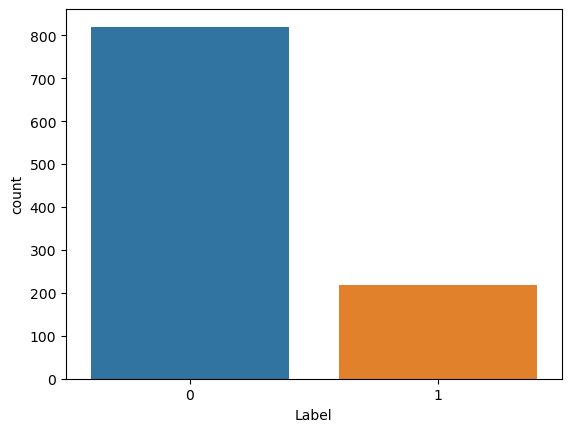

In [184]:
import seaborn as sns

sns.countplot(x="Label", data=ext)

In [240]:
Y = ext["Label"].values

In [241]:
X = ext.drop(labels = ["Label"], axis=1)

In [242]:
# Scaling data for processing

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [243]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 41)

In [244]:
# Building XGBoost model

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [245]:
y_pred = model.predict(X_test)

In [246]:
from sklearn.metrics import accuracy_score
accuracy_xg = accuracy_score(y_test, y_pred)

In [247]:
print("Accuracy = ", (accuracy_xg * 100.0), "%")

Accuracy =  100.0 %


In [248]:
# Get the feature importances
importances_xg = model.feature_importances_

In [251]:
# Sort and print the feature importances
feature_importances_xg = sorted(zip(importances_xg, X.columns), reverse=True)
for importance, feature in feature_importances_xg:
    print(f"{feature}: {importance}")

Covered by Health Insurance: 0.9203683137893677
Encoded Destination: 0.021302439272403717
Supplemental Security Income (SSI): 0.012296072207391262
Income from Any Source: 0.012053338810801506
Staff Encoded: 0.01056505274027586
VA Medical: 0.008281712420284748
Physical Disability: 0.004379308316856623
Developmental Disability: 0.0022143127862364054
Veteran Status: 0.001276032067835331
Days Enrolled: 0.0012287807185202837
Mental Health Disorder: 0.0007757339626550674
VA Disability Comp: 0.0007728143827989697
Gender: 0.0006959769525565207
Total Monthly Income for Individual: 0.0006262188544496894
Receiving Non-Cash Benefits: 0.0005983918090350926
MEDICARE: 0.0005028570303693414
MEDICAID: 0.0003494888951536268
Age: 0.00030905954190529883
Long Term: 0.0003048395738005638
Chronic Homeless: 0.00024673310690559447
State Health Insurance for Adults: 0.0002275730948895216
Ethnicity: 0.00017036999634001404
Worker's Compensation: 0.00015437429829034954
Long Term.3: 0.00013648817548528314
Long Term

In [191]:
X.shape

(1038, 62)

In [192]:
Y.shape

(1038,)

In [250]:
X = pd.DataFrame(X, columns=ext.columns[:-1])

In [197]:
# Building Random Forest Model

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, Y)

RandomForestClassifier()

In [198]:
# Get the feature importances
importances = rf.feature_importances_

In [199]:
# Sort and print the feature importances
feature_importances = sorted(zip(importances, X.columns), reverse=True)
for importance, feature in feature_importances:
    print(f"{feature}: {importance}")


Encoded Destination: 0.12142432491589683
State Health Insurance for Adults: 0.07247872894818218
Employer-Provided Health Insurance: 0.061759831161849875
Health Insurance Obtained Through COBRA: 0.05000930854713091
HIV - AIDS: 0.0476831612089267
Covered by Health Insurance: 0.046940829803479064
Private Pay Health Insurance: 0.046666850681573786
Indian Health Services Program: 0.04453530688488658
Veteran's Administration (VA) Medical Services: 0.04115545191348678
Days Enrolled: 0.04083168947583138
MEDICAID: 0.035493643224556296
MEDICARE: 0.034767218149630255
Other Health Insurance: 0.03288576418132862
Developmental Disability: 0.03214004894669647
Staff Encoded: 0.025086231918887963
Age: 0.023040413329302505
Supplemental Nutrition Assistance Program (SNAP): 0.0183435684308713
Other TANF-Funded Services: 0.017968474771247474
State Children’s Health Insurance Program: 0.017847878538734936
Substance Use Disorder: 0.017111881940563217
Total Monthly Income for Individual: 0.011465615460664729


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
correlation_matrix = ext.corr()

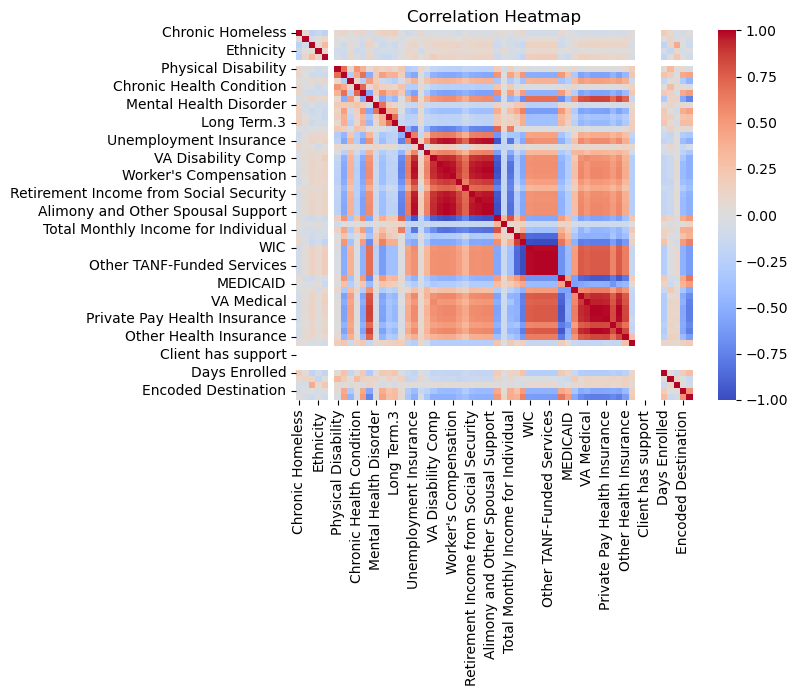

<Figure size 1500x1000 with 0 Axes>

In [253]:
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.figure(figsize=(15,10))
plt.show()

In [258]:
# Select the target column
target_column = 'Label'

In [259]:
# Calculate the correlations between the target column and other columns
correlations = ext.corrwith(ext[target_column])

# Create a new DataFrame with the correlations
correlation_df = pd.DataFrame(correlations, columns=['Correlation'])

# Sort the correlations in descending order
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

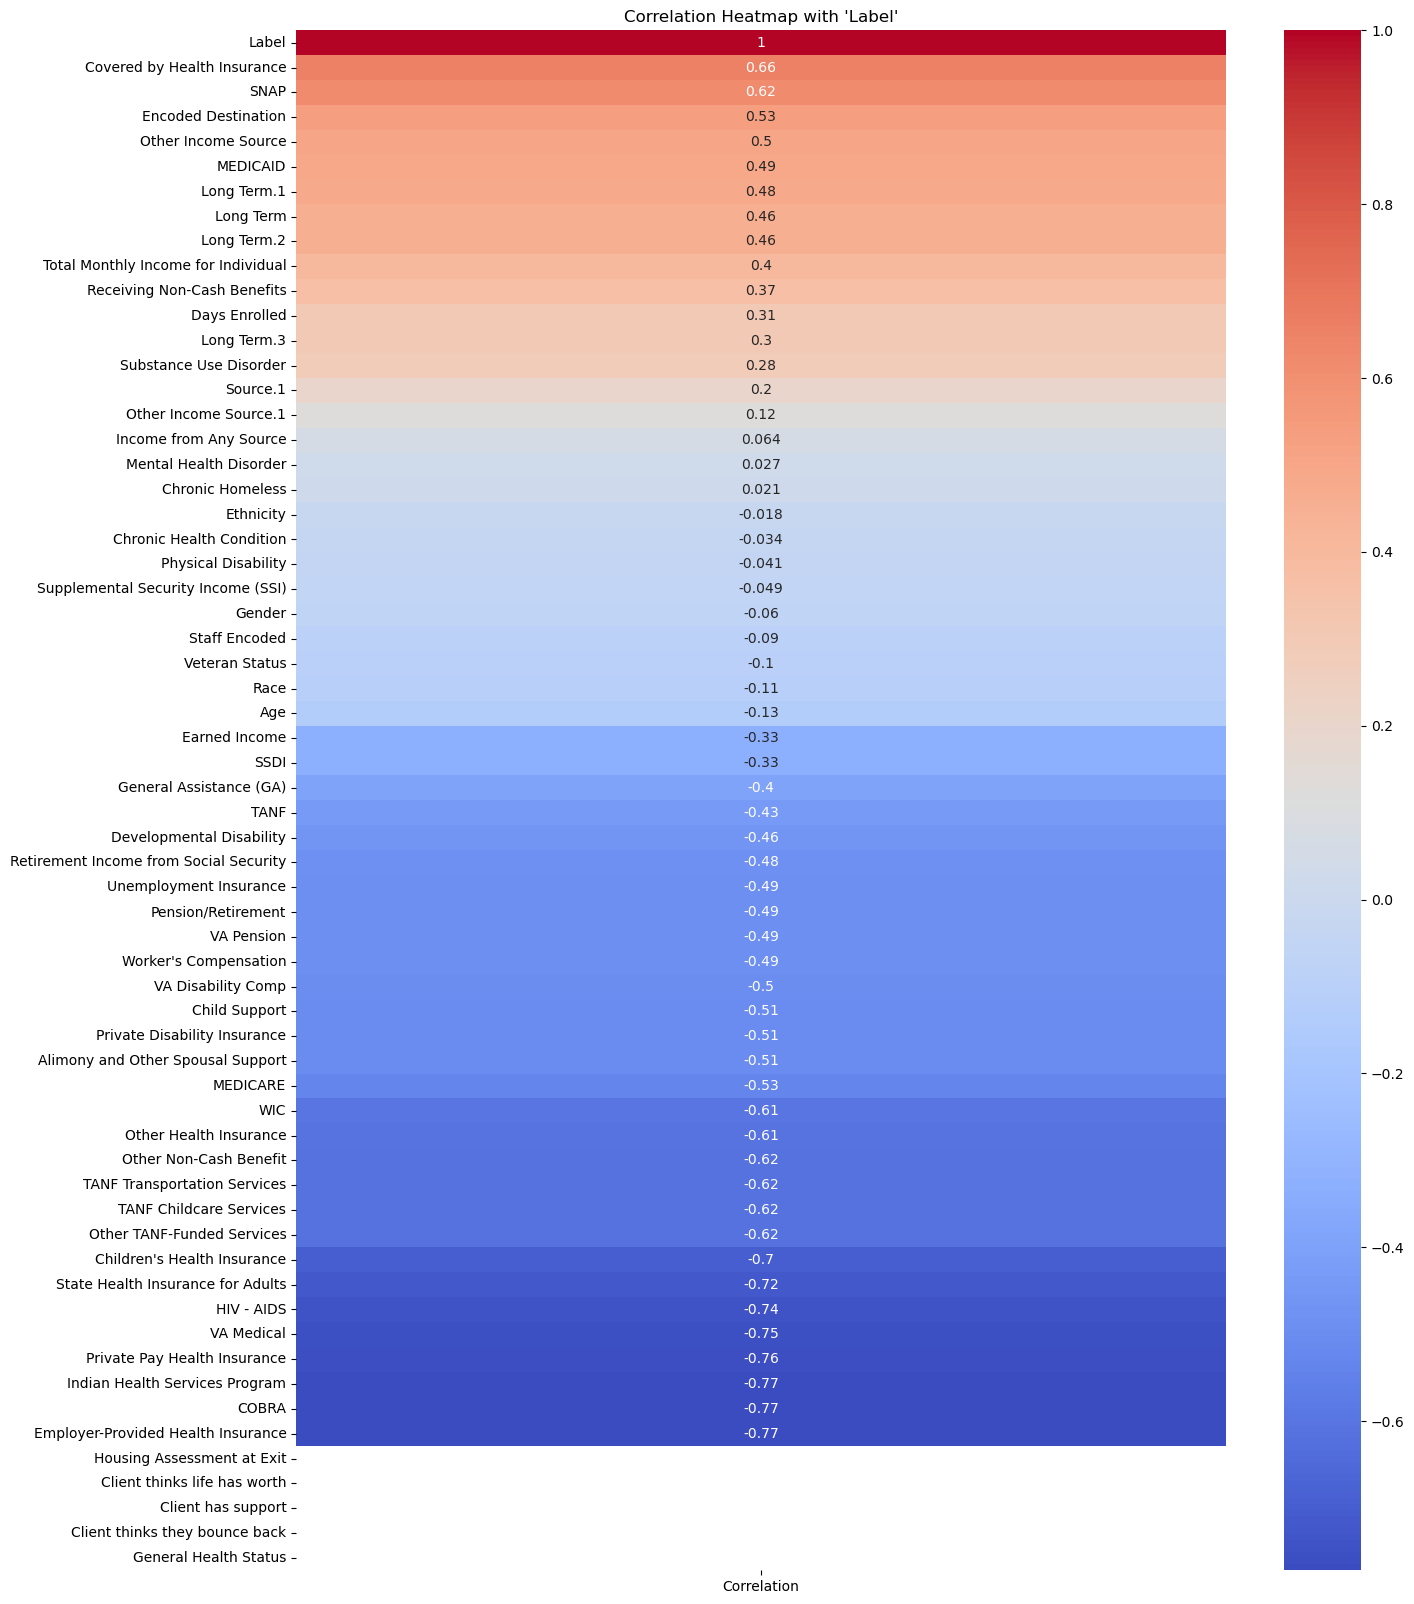

In [262]:
# Plot the correlation heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm")
plt.title(f"Correlation Heatmap with '{target_column}'")
plt.show()


# Try some ANOVA analysis to try to paint a clearer picture
Try SPSS as well, multi variate interactions/correlations